In [1]:
import os
import sys
import time
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import carla

In [2]:
client = carla.Client('localhost', 2000)
client.set_timeout(10.0) # seconds

In [3]:
def direction_lookup(destination_x, origin_x, destination_y, origin_y):
    deltaX = destination_x - origin_x
    deltaY = destination_y - origin_y
    degrees_temp = math.atan2(deltaX, deltaY)/math.pi*180

    if degrees_temp < 0:
        degrees_final = 360 + degrees_temp
    else:
        degrees_final = degrees_temp

    return degrees_final

In [12]:
#Configs
map_idx = 1
MAP = ['circut_spa', 'RaceTrack', 'RaceTrack2']

In [13]:
world = client.load_world(MAP[map_idx])
blueprint_library = world.get_blueprint_library() 

In [14]:
spawn_points = world.get_map().get_spawn_points()

In [15]:
yaws = []
for idx, sp in enumerate(spawn_points[1:]):
    yaw = direction_lookup(spawn_points[idx].location.x, spawn_points[idx].location.y,
                           sp.location.x, sp.location.y)
    yaws.append(yaw)
    
yaw = direction_lookup(spawn_points[-1].location.x, spawn_points[-1].location.y,
                       spawn_points[0].location.x, spawn_points[0].location.y)
yaws.append(yaw)
    
len(yaws)

184

In [16]:
spawn_points_df = pd.DataFrame().from_dict({idx: (sp.location.x, sp.location.y, sp.location.z)
                                            for idx, sp in enumerate(spawn_points)}).T

spawn_points_df.rename(columns={0:'x', 1:'y', 2:'z'}, inplace=True)
spawn_points_df['yaw'] = yaws
spawn_points_df.shape

spawn_points_df.to_csv(f'../data/spawn_points/{MAP[map_idx]}.csv', index=False)

In [17]:
len(spawn_points)

184

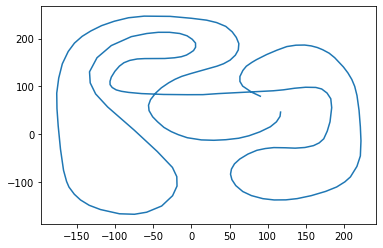

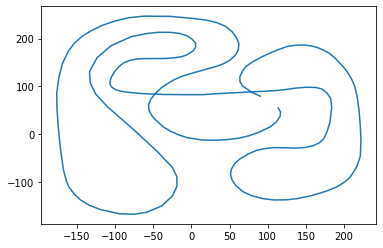

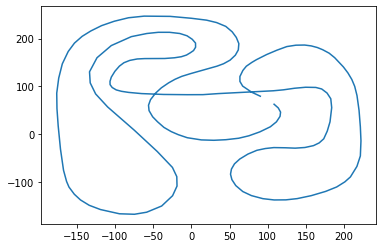

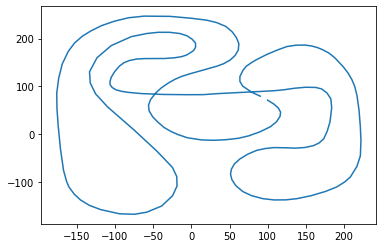

In [18]:
for i in range(180, len(spawn_points)):
    plt.plot(spawn_points_df['x'][:i], spawn_points_df['y'][:i])
    plt.xlim([min(spawn_points_df['x'])-20, max(spawn_points_df['x'])+20])
    plt.ylim([min(spawn_points_df['y'])-20, max(spawn_points_df['y'])+20])
    plt.show()